In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## Finding the uniques value

In [4]:
df.shape

(517, 31)

In [5]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
cl=['month', 'day', 'wind',
       'rain',  'size_category']
for i in cl:
    print(f"\n Unique value of {i} is :\n", df[i].unique())


 Unique value of month is :
 ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']

 Unique value of day is :
 ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']

 Unique value of wind is :
 [6.7 0.9 1.3 4.  1.8 5.4 3.1 2.2 7.2 4.5 4.9 2.7 5.8 3.6 7.6 6.3 8.9 8.5
 9.4 0.4 8. ]

 Unique value of rain is :
 [0.  0.2 1.  6.4 0.8 0.4 1.4]

 Unique value of size_category is :
 ['small' 'large']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
pd.crosstab(index=df["month"],
    columns=df["size_category"])

size_category,large,small
month,,
apr,2,7
aug,43,141
dec,8,1
feb,6,14
jan,0,2
jul,9,23
jun,3,14
mar,12,42
may,1,1


<AxesSubplot:xlabel='size_category', ylabel='month'>

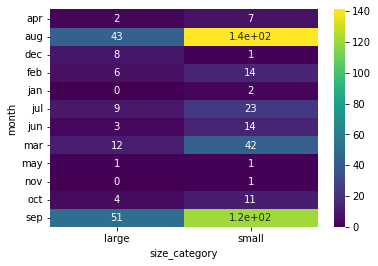

In [9]:
sns.heatmap(pd.crosstab(index=df["month"],
    columns=df["size_category"]),cmap="viridis",annot=True)

In [10]:
pd.crosstab(index=df["day"],
    columns=df["size_category"])

size_category,large,small
day,,
fri,21,64
mon,19,55
sat,26,58
sun,27,68
thu,13,48
tue,20,44
wed,13,41


<AxesSubplot:xlabel='size_category', ylabel='day'>

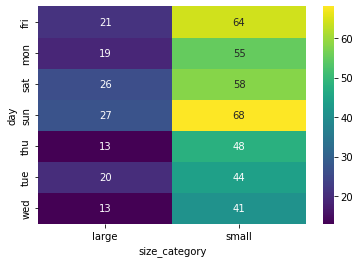

In [11]:
sns.heatmap(pd.crosstab(index=df["day"],
    columns=df["size_category"]),cmap="viridis",annot=True)

## Finding the missing values

<AxesSubplot:>

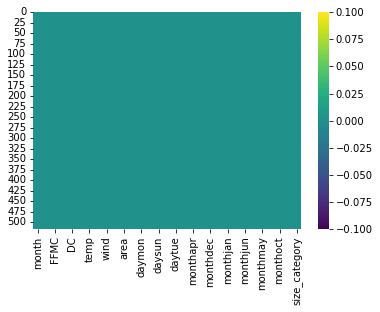

In [12]:
sns.heatmap(df.isnull(),cmap="viridis")#No missing value is there

### Correlation

In [13]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


<AxesSubplot:>

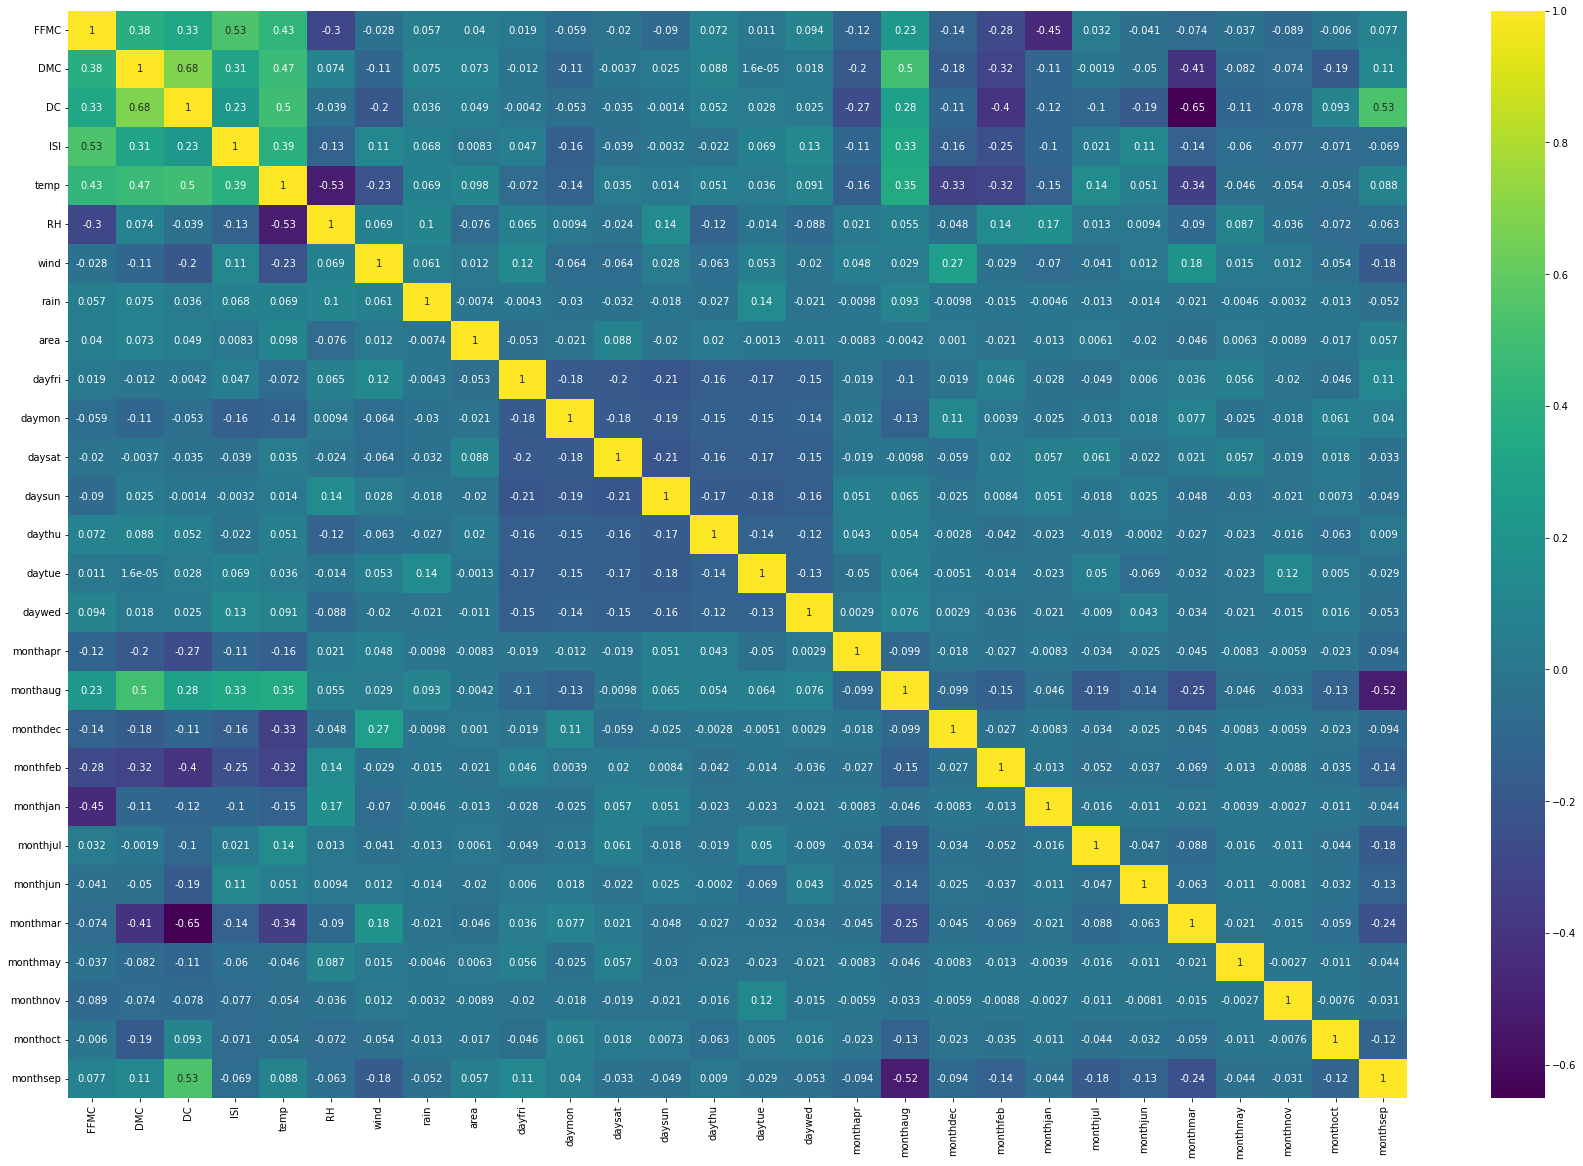

In [14]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

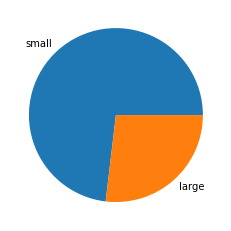

In [15]:
plt.pie(df["size_category"].value_counts(),labels=["small","large"])
plt.show()

### Features and target

In [16]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

### Scaling the dataset

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
from sklearn.preprocessing import LabelEncoder
cl=["month","day","size_category"]
for i in cl:
    le=LabelEncoder()
    df.loc[:,[i]]=le.fit_transform(df.loc[:,[i]])

C:\Users\shiwam\Anaconda_shi\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shiwam\Anaconda_shi\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shiwam\Anaconda_shi\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


###  Feature scaling to the " month	, day, 	FFMC, 	DMC, 	DC, 	ISI, 	temp, 	RH, 	wind, 	rain"

In [24]:
from sklearn.preprocessing import StandardScaler
cl1=["month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]
for i in cl1:
    SC=StandardScaler()
    df.loc[:,[i]]=SC.fit_transform(df.loc[:,[i]])

### Feature and target variable

In [25]:
x=df.loc[:,['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep']].values
y=df["size_category"].values

In [26]:
x

array([[ 0.28422225, -1.42312073, -0.80595947, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.97087134,  1.17671466, -0.00810203, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.97087134, -0.38318657, -0.00810203, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.08907592,  0.13678051, -1.64008316, ...,  0.        ,
         0.        ,  0.        ],
       [-1.08907592, -0.38318657,  0.68095666, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.74198831,  1.17671466, -2.02087875, ...,  1.        ,
         0.        ,  0.        ]])

In [28]:
x.shape

(517, 30)

In [27]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

### Importing the necessary packages

In [30]:
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
import keras

## Defining the model

In [34]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(100,input_dim=x.shape[1], activation='relu'))
    model.add(Dense(100,kernel_initializer="uniform", activation='relu'))
    model.add(Dense(1,kernel_initializer="uniform", activation='sigmoid'))
    
    adam=keras.optimizers.Adam(learning_rate=0.001)#learning rate alpha=0.01
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [35]:
import warnings
warnings.filterwarnings("ignore")
#Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)


### Now defining the grid search parameters

In [36]:

batch_size = [10,20,40]
epochs = [10,50,100]
# learning_rate = [0.001,0.01,0.1]
# dropout_rate = [0.0,0.1,0.2]
# activation_function = ['softmax','relu','tanh','linear']
# init = ['uniform','normal','zero']#Initialization
# neuron1 = [4,8,16]
# neuron2 = [2,4,8]
# #(3*3*3*3*4*3*3*3)=total model

### Make a dictionary of the grid search parameters


In [37]:

param_grids = dict(batch_size = batch_size,epochs = epochs)


### Build and fit the GridSearchCV


In [38]:
grid = GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_results=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   4.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.981 total time=   3.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   3.1s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.981 total time=   3.2s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.942 total time=   3.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.990 total time=   6.5s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.961 total time=   6.7s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.971 total time=   6.5s


In [40]:
# Summarize the results
print('Best : {}, using {}'.format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9864264369010926, using {'batch_size': 20, 'epochs': 100}
0.9806198596954345,0.021270919744903034 with: {'batch_size': 10, 'epochs': 10}
0.9825616121292114,0.015529488058387171 with: {'batch_size': 10, 'epochs': 50}
0.9786967873573303,0.014238782400432876 with: {'batch_size': 10, 'epochs': 100}
0.9825616121292114,0.015529488058387171 with: {'batch_size': 20, 'epochs': 10}
0.978715455532074,0.01772355343112928 with: {'batch_size': 20, 'epochs': 50}
0.9864264369010926,0.013175137885684128 with: {'batch_size': 20, 'epochs': 100}
0.9709671378135681,0.024488183520068936 with: {'batch_size': 40, 'epochs': 10}
0.9825802922248841,0.01549231197167874 with: {'batch_size': 40, 'epochs': 50}
0.9786967873573303,0.014238782400432876 with: {'batch_size': 40, 'epochs': 100}


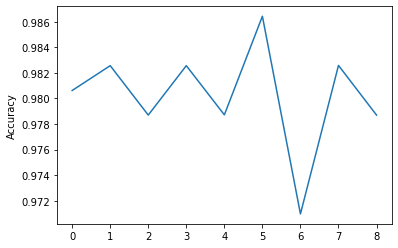

In [46]:
plt.ylabel("Accuracy")
plt.plot(grid_results.cv_results_['mean_test_score'])